## Data Augmentation

In [2]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [6]:
path = Path('data/vwGolfsBingCombined2Split/train')

## From Data to DataLoaders

In [7]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

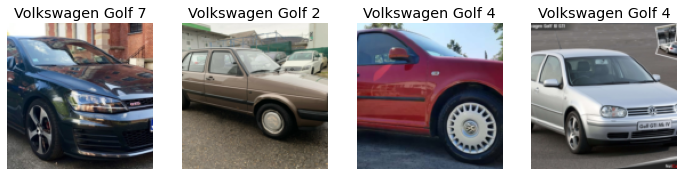

In [8]:
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

### Data Augmentation

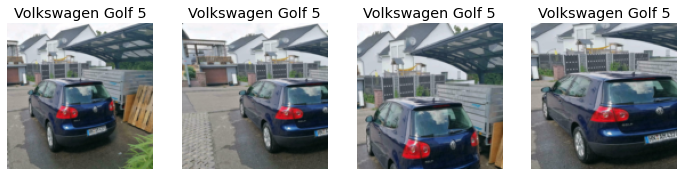

In [9]:
cars = cars.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

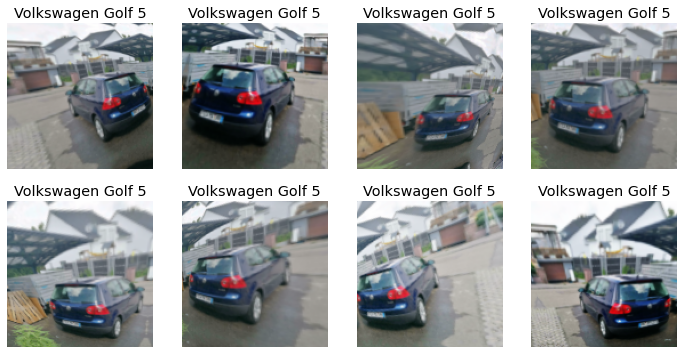

In [10]:
cars = cars.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = cars.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)